# Short duration satellite missions  (S-PCS <1GHz) Uplinks

## License

```
Single terrestrial transmitter vs RAS station compatibility study

2020 - Federico Di Vruno (f.divruno@skatelescope.org)
(based on examples on pycraf by B. Winkel)

This program is free software; you can redistribute it and/or
modify it under the terms of the GNU General Public License
as published by the Free Software Foundation; either version 2
of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program; if not, write to the Free Software
Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301, USA.
```

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pycraf import conversions as cnv
from pycraf import atm
from pycraf import protection
from pycraf import pathprof
import astropy.units as u
import pandas as pd

%load_ext lab_black
# tell pycraf where to store the SRTM tiles
# use this only if the SRTMDATA environment variable wasn't set
# pathprof.SrtmConf.set(
#     srtm_dir=r"C:\Users\F.Divruno\Dropbox (SKA)\Python_codes\STRM_data"
# )
pathprof.SrtmConf.set(download="missing")

<MultiState SrtmConf>


## S-PCS Uplinks  
This notebok can be used to study Earth Stations uplinks and Subscribers uplinks. This only considers one device, perhaps on the subscribers link aggregation should be considered.


In [5]:
def calc_att(
    lat,
    lon,
    temperature,
    time_percent,
    pressure,
    h_tg,
    h_rg,
    freq,
    zone_t=pathprof.CLUTTER.UNKNOWN,
    zone_r=pathprof.CLUTTER.UNKNOWN,
):
    # Create a generic height profile data
    hprof_data = pathprof.height_path_data_generic(
        distance=200 * u.km,
        step=0.1 * u.km,
        lon_mid=lon,
        lat_mid=lat,
        zone_t=zone_t,
        zone_r=zone_r,
    )
    atten_path = pathprof.atten_path_fast(
        freq, temperature, pressure, h_tg, h_rg, time_percent, hprof_data,
    )
    return hprof_data["distances"], atten_path["L_b_corr"]

Define propagation model parameters

In [3]:
lat = 50 * u.deg
lon = 7 * u.deg
temperature = 290 * u.K
pressure = 1013 * u.hPa
time_percent = 10 * u.percent
# Assuming the device can be over a table or something like that
# we suppose it could easily be in the roof of a house?
h_tg = 1 * u.m
# Considering the not so worst case for a low freqeucny antenna
# from an array like LoFAR or Nancay and not a dish.
h_rg = 2 * u.m
# SPARSE clutter in the tx, no clutter in the RX.
zone_t, zone_r = pathprof.CLUTTER.SPARSE, pathprof.CLUTTER.UNKNOWN

tab_data = {
    "Latitude": [lat],
    "Longitude": [lon],
    "temperature": [temperature],
    "pressure": [pressure],
    "time_percent": [time_percent],
    "Tx_height": [h_tg],
    "Rx_height": [h_rg],
    "Tx_Clutter": [zone_t],
    "Rx_Clutter": [zone_r],
    }

prop_model_params = pd.DataFrame(
    tab_data,
    columns=[
        "Latitude",
        "Longitude",
        "temperature",
        "pressure",
        "time_percent",
        "Tx_height",
        "Rx_height",
        "Tx_Clutter",
        "Rx_Clutter",
        ],
    )

In [4]:
freq = 152 * u.MHz
dist, Atten = calc_att(
    lat=prop_model_params.Latitude[0],
    lon=prop_model_params.Longitude[0],
    temperature=prop_model_params.temperature[0],
    time_percent=prop_model_params.time_percent[0],
    pressure=prop_model_params.pressure[0],
    h_tg=prop_model_params.Tx_height[0],
    h_rg=prop_model_params.Rx_height[0],
    freq=freq,
    zone_t=prop_model_params.Tx_Clutter[0],
    )

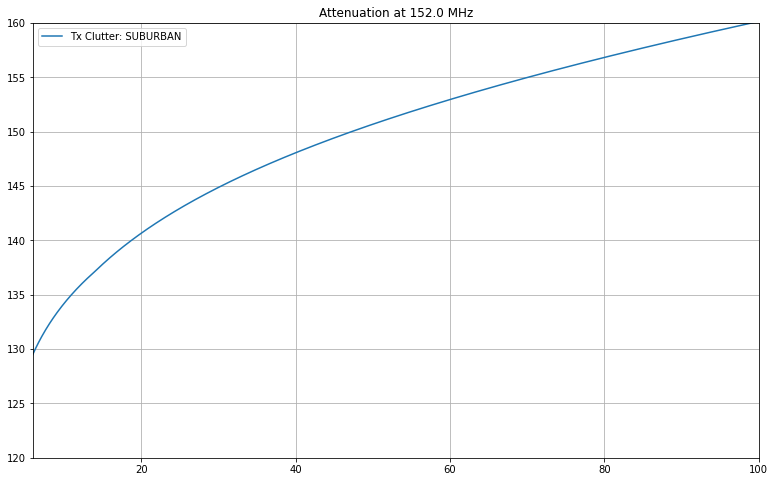

In [5]:
plt.figure(figsize=[13, 8])
ax = plt.axes()
ax.plot(dist, Atten, label="Tx Clutter: SUBURBAN")
ax.set_xlim([6, 100])
ax.set_ylim([120, 160])
plt.legend()
plt.title("Attenuation at {:s}".format(freq))
ax.grid(which="both")
plt.show()

In [6]:
freq = 408 * u.MHz
dist, Atten = calc_att(
    lat=prop_model_params.Latitude[0],
    lon=prop_model_params.Longitude[0],
    temperature=prop_model_params.temperature[0],
    time_percent=prop_model_params.time_percent[0],
    pressure=prop_model_params.pressure[0],
    h_tg=prop_model_params.Tx_height[0],
    h_rg=prop_model_params.Rx_height[0],
    freq=freq,
    zone_t=prop_model_params.Tx_Clutter[0],
    )

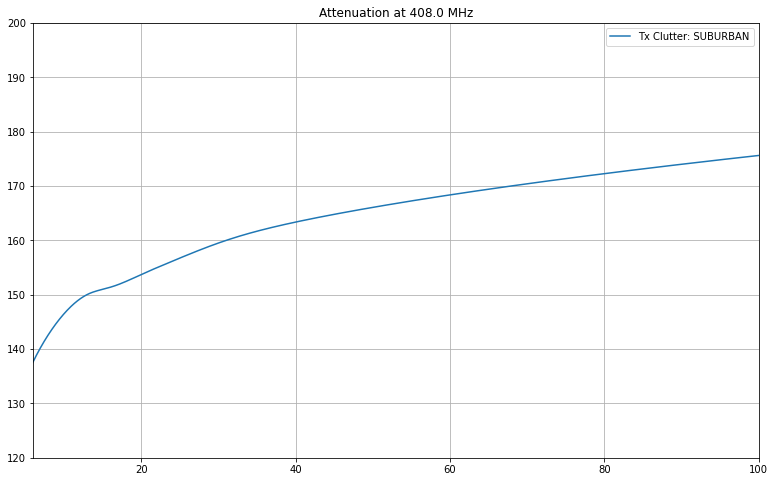

In [7]:
plt.figure(figsize=[13, 8])
ax = plt.axes()
ax.plot(dist, Atten, label="Tx Clutter: SUBURBAN")
ax.set_xlim([6, 100])
ax.set_ylim([120, 200])
plt.legend()
plt.title("Attenuation at {:s}".format(freq))
ax.grid(which="both")
plt.show()

Now assessing the effect of Clutter

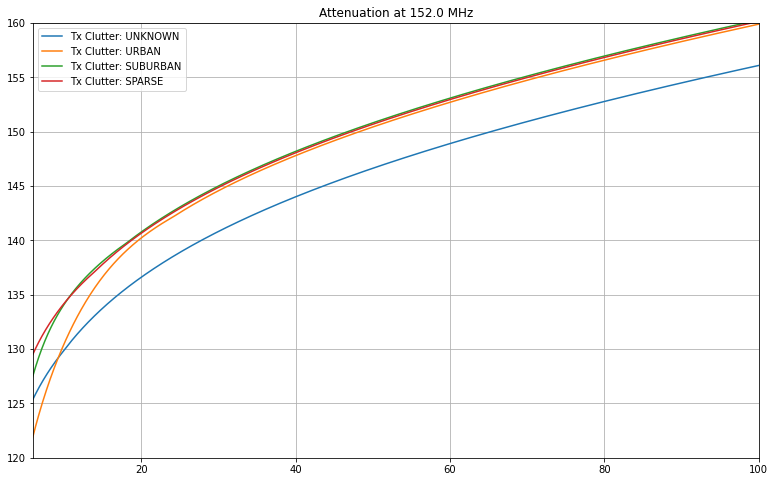

In [8]:
freq = 152 * u.MHz

plt.figure(figsize=[13, 8])
ax = plt.axes()
for zone in ["UNKNOWN", "URBAN", "SUBURBAN", "SPARSE"]:
    zone_t = getattr(pathprof.CLUTTER, zone)
    dist, Atten = calc_att(
        lat, lon, temperature, time_percent, pressure, h_tg, h_rg, freq, zone_t=zone_t
        )
    ax.plot(dist, Atten, label="Tx Clutter: {:s}".format(zone))

ax.set_xlim([6, 100])
ax.set_ylim([120, 160])
plt.legend()
plt.title("Attenuation at {:s}".format(freq))
ax.grid(which="both")
plt.show()

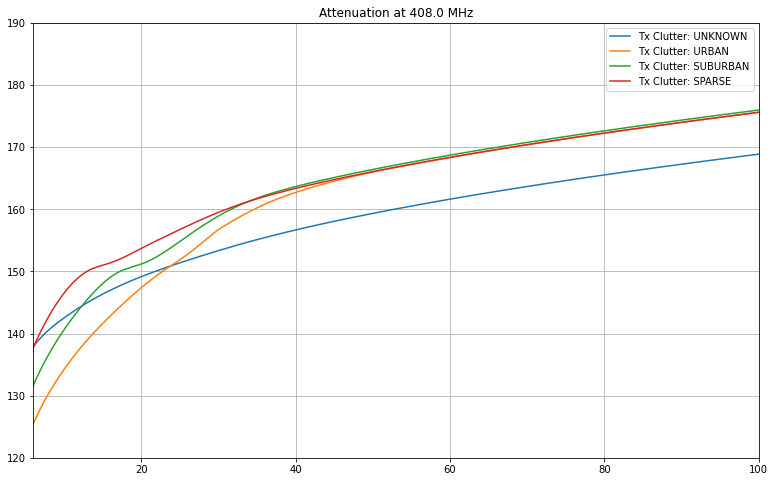

In [9]:
freq = 408 * u.MHz
plt.figure(figsize=[13, 8])
ax = plt.axes()
for zone in ["UNKNOWN", "URBAN", "SUBURBAN", "SPARSE"]:
    zone_t = getattr(pathprof.CLUTTER, zone)
    dist, Atten = calc_att(
        lat, lon, temperature, time_percent, pressure, h_tg, h_rg, freq, zone_t=zone_t
        )
    ax.plot(dist, Atten, label="Tx Clutter: {:s}".format(zone))

ax.set_xlim([6, 100])
ax.set_ylim([120, 190])
plt.legend()
plt.title("Attenuation at {:s}".format(freq))
ax.grid(which="both")
plt.show()

In [10]:
# Load the parameters of the systems considered for the study:
# (make sure, the excel file is in the same folder as the notebook)
system_params = pd.read_excel("S-PCS parameters for RAS compatibility study.xlsx")
system_params

,Name,Fo [MHz],Ptx [dBW],Go [dBi],d [%],B [kHz],N,OOB [dBc],PSD in RAS band [dBW/Hz],MCL [dB],Min dist [km]
0,LEOTEL-1 Uplinks,152.0,10.96,0.00,0.01,5.0,1.0,-60.0,NaN,NaN,NaN
1,SWARM Uplink,152.0,7.60,0.00,1.00,20.8,1.0,-70.0,NaN,NaN,NaN
2,Myriota IoT Uplink,152.0,-3.00,0.00,0.02,4.0,1.0,-65.0,NaN,NaN,NaN
3,Myriota uGateway Uplink,152.0,-3.00,0.00,0.50,25.0,1.0,-65.0,NaN,NaN,NaN
4,Hiber Uplink,408.0,1.76,0.00,1.80,120.0,1.0,-65.0,NaN,NaN,NaN
5,Argos Uplink,408.0,0.00,0.00,0.30,120.0,1.0,-65.0,NaN,NaN,NaN
6,Myriota IoT Uplink,408.0,-3.00,0.00,0.02,4.0,1.0,-65.0,NaN,NaN,NaN
7,Myriota uGateway Uplink,408.0,-3.00,0.00,0.50,25.0,1.0,-65.0,NaN,NaN,NaN
8,Fleet Uplink,408.0,1.00,0.00,0.10,120.0,1.0,-60.0,NaN,NaN,NaN
9,SWARM Downlink,137.5,1.76,0.00,10.00,20.8,150.0,-100.0,NaN,NaN,NaN


In [11]:
# Calculate the minimum distance for each system :
for i in range(9):
    # get system parameters
    ptx = system_params["Ptx [dBW]"][i] * cnv.dB_W
    Go = system_params["Go [dBi]"][i] * cnv.dBi
    duty = (system_params["d [%]"][i] * u.percent).to(u.dB(cnv.dimless))
    BW = (system_params["B [kHz]"][i] * u.kHz).to(u.dB(u.Hz))
    OOB = system_params["OOB [dBc]"][i] * cnv.dB
    freq = system_params["Fo [MHz]"][i] * u.MHz

    system_params.loc[i, ("PSD in RAS band [dBW/Hz]")] = np.round(
        ptx + Go + duty - BW + OOB, decimals=2
        ).to_value(cnv.dB_W_Hz)

    # get ras protection level for the frequency considered
    if freq <= 160 * u.MHz:
        ind = 3
    else:
        ind = 5

    RAS_fo = protection.ra769_limits("continuum")[ind]["frequency"]
    RAS_lim_dBW_Hz = protection.ra769_limits("continuum")[ind]["Plim_nu"]
    RAS_BW = protection.ra769_limits("continuum")[ind]["bandwidth"]

    # Calculate  MCL
    system_params.loc[i, ("MCL [dB]")] = np.round(
        system_params["PSD in RAS band [dBW/Hz]"][i] * cnv.dB_W_Hz - RAS_lim_dBW_Hz,
        decimals=2,
        ).to_value(cnv.dB)

    # Get te parameters for the propagation model
    dist, Atten = calc_att(
        lat=prop_model_params.Latitude[0],
        lon=prop_model_params.Longitude[0],
        temperature=prop_model_params.temperature[0],
        time_percent=prop_model_params.time_percent[0],
        pressure=prop_model_params.pressure[0],
        h_tg=prop_model_params.Tx_height[0],
        h_rg=prop_model_params.Rx_height[0],
        freq=freq,
        zone_t=prop_model_params.Tx_Clutter[0],
        )
    idx = np.where((Atten) >= (system_params["MCL [dB]"][i] * cnv.dB))[0][0]
    min_dist = dist[idx] * u.km
    system_params.loc[i, ("Min dist [km]")] = (
        np.round(min_dist, decimals=2).to_value(u.km)
        )

print(prop_model_params.T)

system_params

                       0
Latitude        50.0 deg
Longitude        7.0 deg
temperature      290.0 K
pressure      1013.0 hPa
time_percent      10.0 %
Tx_height          1.0 m
Rx_height          2.0 m
Tx_Clutter             0
Rx_Clutter            -1


,Name,Fo [MHz],Ptx [dBW],Go [dBi],d [%],B [kHz],N,OOB [dBc],PSD in RAS band [dBW/Hz],MCL [dB],Min dist [km]
0,LEOTEL-1 Uplinks,152.0,10.96,0.00,0.01,5.0,1.0,-60.0,-126.03,138.20,15.6
1,SWARM Uplink,152.0,7.60,0.00,1.00,20.8,1.0,-70.0,-125.58,138.65,16.4
2,Myriota IoT Uplink,152.0,-3.00,0.00,0.02,4.0,1.0,-65.0,-141.01,123.22,3.4
3,Myriota uGateway Uplink,152.0,-3.00,0.00,0.50,25.0,1.0,-65.0,-134.99,129.24,5.8
4,Hiber Uplink,408.0,1.76,0.00,1.80,120.0,1.0,-65.0,-131.48,137.29,5.9
5,Argos Uplink,408.0,0.00,0.00,0.30,120.0,1.0,-65.0,-141.02,127.75,3.4
6,Myriota IoT Uplink,408.0,-3.00,0.00,0.02,4.0,1.0,-65.0,-141.01,127.76,3.4
7,Myriota uGateway Uplink,408.0,-3.00,0.00,0.50,25.0,1.0,-65.0,-134.99,133.78,4.8
8,Fleet Uplink,408.0,1.00,0.00,0.10,120.0,1.0,-60.0,-139.79,128.98,3.7
9,SWARM Downlink,137.5,1.76,0.00,10.00,20.8,150.0,-100.0,NaN,NaN,NaN


# Average attenuation path in different telescope locations
Use the P.452 propagation model to calculate the average attenuation in distance from known observatories at 152 MHz and 408 MHz.

In [12]:
from astropy.coordinates import EarthLocation

RT_sites = EarthLocation.get_site_names()
ALMA = EarthLocation.of_site("ALMA")
GBT = EarthLocation.of_site("GBT")
MeerKAT = EarthLocation.from_geodetic(21.44, -30.7, 1000)

LoFAR = EarthLocation.from_geodetic(6.86889, 52.90889, 0)
Effelsberg = EarthLocation.from_geodetic(6.8839, 50.5251, 330)
Nancay = EarthLocation.from_geodetic("2°11′42″", "47°22′50″")
JBO = EarthLocation.from_geodetic("2°18′26″", "53°14′10″")
Parkes = EarthLocation.from_geodetic("148°15′47″", "-32°59′52″")
MWA = EarthLocation.from_geodetic("116°40′16″", "-26°42′12″")

RT_list = [LoFAR, Nancay, Effelsberg, JBO, MeerKAT, MWA]
RT_list_name = ["LoFAR", "Nancay", "Effelsberg", "JBO", "MeerKAT", "MWA"]
d_steps = 100

In [13]:
freq = 150 * u.MHz
# freq = 408 * u.MHz
Att_median = np.zeros([len(RT_list), d_steps]) * u.dB
for k in range(len(RT_list)):
    lat_r, lon_r = RT_list[k].geodetic.lat, RT_list[k].geodetic.lon
    map_size_lon, map_size_lat = 2 * u.deg, 2 * u.deg
    map_resolution = 50.0 * u.arcsec

    omega = 0.0 * u.percent  # fraction of path over sea
    temperature = prop_model_params.temperature[0]
    time_percent = prop_model_params.time_percent[0]
    pressure = prop_model_params.pressure[0]
    h_tg = prop_model_params.Tx_height[0]
    h_rg = prop_model_params.Rx_height[0]
    zone_t = prop_model_params.Tx_Clutter[0]

    G_t, G_r = 0 * cnv.dBi, 0 * cnv.dBi
    hprof_step = 10 * u.m
    freq = 150 * u.MHz

    hprof_cache = pathprof.height_map_data(
        lon_r,
        lat_r,
        map_size_lon,
        map_size_lat,
        map_resolution=map_resolution,
        zone_t=zone_t,
        zone_r=zone_r,
        )  # dict-like

    atten_maps = pathprof.atten_map_fast(
        freq, temperature, pressure, h_tg, h_rg, time_percent, hprof_cache,
        )

    lons = hprof_cache["xcoords"]
    lats = hprof_cache["ycoords"]

    total_atten = atten_maps["L_b_corr"]
    dist_map = hprof_cache["dist_map"]

    # Calculate the mean attenuation for each distance in dist map
    d_max = dist_map.max() / np.sqrt(2)
    d_min = 10
    d_step = (d_max - d_min) / 100
    d_bins = np.arange(d_min, d_max, d_step)
    d_bins_lower = d_bins[0:-1]
    d_bins_upper = d_bins[1:]
    d_bins_mids = 0.5 * (d_bins_lower + d_bins_upper)

    for j, (_lo, _hi) in enumerate(zip(d_bins_lower, d_bins_upper)):
        mask = (dist_map >= _lo) & (dist_map < _hi)
        Att_median[k, j] = np.median(total_atten[mask].to(cnv.dimless)).to(cnv.dB)

In [14]:
# Compare to the generic smooth earth approximation:
lat = RT_list[0].lat
lon = RT_list[0].lon

dist, Atten = calc_att(lat, lon, temperature, time_percent, pressure, h_tg, h_rg, freq)

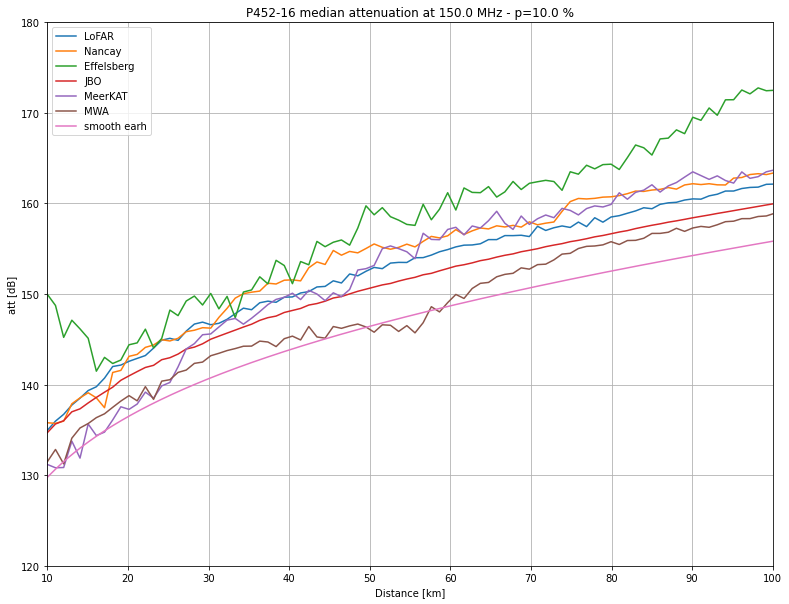

In [15]:
plt.figure(figsize=[13, 10])
plt.plot(np.arange(d_min, d_max, d_step), Att_median.T)
plt.plot(dist, Atten)
legends = RT_list_name
legends.append("smooth earh")
plt.legend(legends)
plt.title("P452-16 median attenuation at %s - p=%s" % (freq, time_percent))
plt.xlim([10, 100])
plt.ylim([120, 180])
plt.grid()
plt.xlabel("Distance [km]")
plt.ylabel("att [dB]")
plt.show()